In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


## Table of contents
* [Introduction: The Question](#introduction)
* [Data](#data)
* [Data Exploration](#dataexpo)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction   <a name="introduction"></a> 
<p style="color:#3383ff";>
Apps govern our daily lives, with everything from tracking our diets to games. So I set off with a kaggle data set from 2018 analysing the meta data of the app store apps at that time, in hopes to gain a better understanding of the types of popular apps on the app store. So what principle properties govern a successful, what types of apps are most popular?  What properties and words frequently used in reviews can reveal and the sentiment towards those apps. 
This information will be useful in developing apps and determining what aspects of an app do users like and respond well to, compared to negative facets of apps. This information may be useful to understanding how app reviews reflect functionality and general usefulness. </p>

## Data <a name = 'Data'></a>

<body>
  <p style="color:#3383ff";> The data is retrieved from kaggle and is composed as app info as well as reviews. This section conducts some exploritory data analysis  </p>
</body>

In [2]:
#import the data in to a pandas dataframe
app_info = pd.read_csv("googleplaystore.csv")
app_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
app_info_headers = app_info.head(0)

## drop the unecessary data 
app_info = app_info.dropna()
#app_reviews = app_reviews.dropna()
app_reviews.shape

#app_reviews.head()

(64295, 5)

#### The fixed installs are strings with "+" in them the below cell changes the input into an easier to use value

In [4]:
l = []
#len(app_info['Installs'])-1
for i in range(0, len(app_info['Installs'])):
    
    num = str(app_info['Installs'].iloc[i])
    num = num.replace(",", "")
    x = num
    x = x[:len(x)-1]
    
    try:
        l.append(float(x))
    except ValueError:
        l.append(100)
    
app_info["FixedInstalls"] = l


In [5]:
l = []
#len(app_info['Installs'])-1

for i in range(0, len(app_info['Price'])):

    num = str(app_info['Price'].iloc[i])

    num = num.replace("$", "")

    l.append(float(num))

    
app_info["Price"] = l

#### The below cell converts reviews and ratings into floats for easier data analysis

In [6]:
####app_info["Reviews"].iloc[10472].replace('3.0M', "3000000")
#the value at app_info[10472] is not very easy to format so I hard coded it
app_info.at[10472, "Reviews"]= "3000000"
app_info["Reviews"] = app_info["Reviews"].astype(float)
app_info["Rating"] = app_info["Rating"].astype(float)

app_info = app_info.dropna()



## Data Exploration   <a name="dataexpo"></a> 

 <p style="color:#3383ff";> The below section contains some preliminary plots to better understand the data </p>




(0, 6.0)

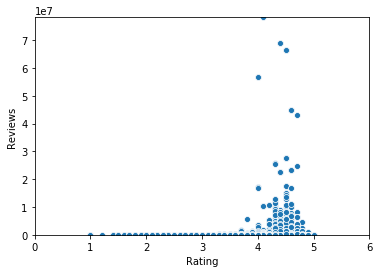

In [7]:
#ax_reg_rating_install = sns.regplot(x="Rating", y='FixedInstalls', data=app_info)

ax_reg_rating = sns.scatterplot(x ="Rating", y = "Reviews", data = app_info)
plt.ylim(0, max(app_info["Reviews"])+10)
plt.xlim(0, max(app_info["Rating"])+1)

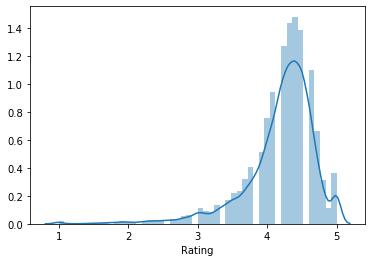

In [8]:
ax_hist_rating = sns.distplot(app_info["Rating"])

(-1, 1052076076.3241887)

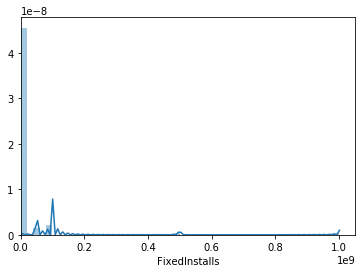

In [9]:
sns.distplot(app_info["FixedInstalls"])

plt.xlim(-1, None)


(-1, 1052076076.3241887)

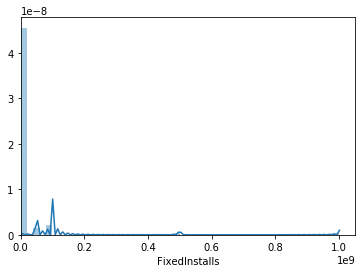

In [10]:

sns.distplot(app_info["FixedInstalls"])

plt.xlim(-1,)




### From the above plots we can see that the over reviews tend to be skewd right. Most people tend to provide overall positive reviews
### We can see that most apps tend to have between [0, 0.25e8], while some apps have lots rating 


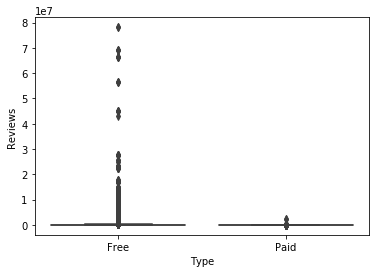

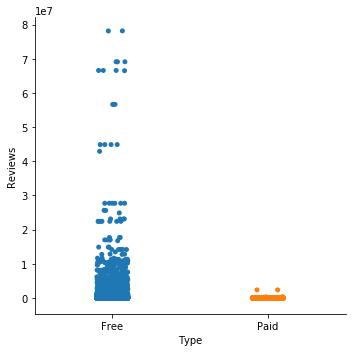

In [11]:

ax_boxplot_type = sns.boxplot(x ="Type", y="Reviews", data=app_info)
ax_catplot_type = sns.catplot(x = "Type", y = "Reviews", data = app_info)


In [12]:
#plot_of_types = sns.barplot(x = app_info["Genres"])
app_info["Category"].nunique()

33

#### With grouping by category , and ensuring the there were at least 10000 reviews in that category, we plotted the number of installs. From this we can see that social apps and games make up the largest categories of apps with the most installs

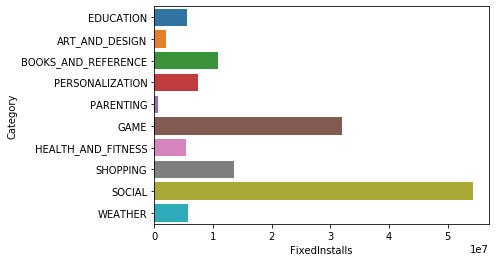

In [19]:
grouped = app_info.groupby(app_info["Category"])
groups_df = grouped.aggregate(np.mean)

Top_10_rating = groups_df.sort_values(by=['Rating'], ascending = False)
Top_10_rating = Top_10_rating[Top_10_rating["Reviews"] > 10000]
#Top_10_rating.drop("FixedInstalls")
x_val= Top_10_rating.iloc[0:10]
x_val.reset_index(drop =False, inplace = True)
top_10 = sns.barplot(y = 'Category', x =  "FixedInstalls", data = x_val)
plt.xlim(0, None)
plt.show() 




###  We then continued to find the top 10 genres based on ratings

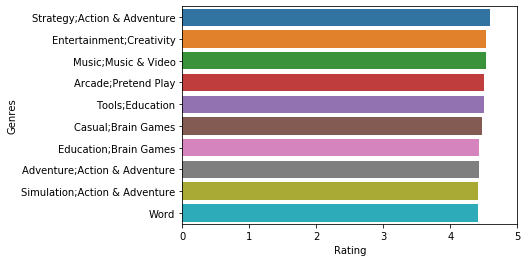

In [20]:
grouped = app_info.groupby(app_info["Genres"])
groups_df = grouped.aggregate(np.mean)

Top_10_rating = groups_df.sort_values(by=['Rating'], ascending = False)
Top_10_rating = Top_10_rating[Top_10_rating["Reviews"] > 10000]
#Top_10_rating.drop("FixedInstalls")
x_val= Top_10_rating.iloc[0:10]
x_val.reset_index(drop =False, inplace = True)
top_10 = sns.barplot(y = 'Genres', x =  "Rating", data = x_val)
plt.xlim(0, 5)
plt.show() 
bot_10_rating = groups_df.sort_values(by=['Rating'], ascending = False)
bot_10_rating = bot_10_rating[bot_10_rating["Reviews"] > 10000]
#Top_10_rating.drop("FixedInstalls")
x_val= bot_10_rating.tail(10)
x_val.reset_index(drop =False, inplace = True)



In [21]:
###  As well as the bottom 10 Genres

(0, 5)

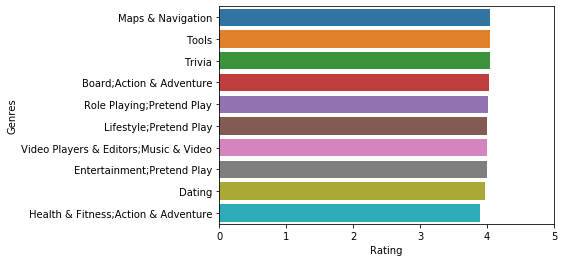

In [22]:
bottom_10 = sns.barplot(y = 'Genres', x =  "Rating", data = x_val)

plt.xlim(0, 5)

### This section took the genres and plotted them based on their mean level of varaibility across apps in the Genre. Below shows apps with the least varaibility in their ratings

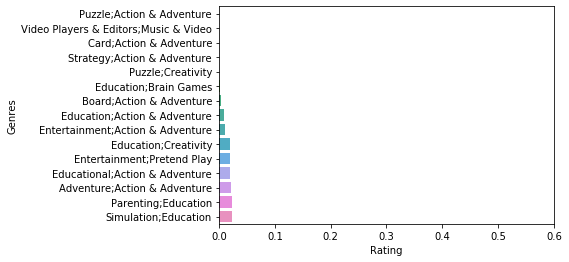

<Figure size 432x288 with 0 Axes>

In [26]:
grouped = app_info.groupby(app_info["Genres"])
groups_df = grouped.aggregate(np.var)

Top_10_rating = groups_df.sort_values(by=['Rating'], ascending = True)
Top_10_rating = Top_10_rating[Top_10_rating["Reviews"] > 10000]
#Top_10_rating.drop("FixedInstalls")
x_val= Top_10_rating.iloc[0:15]
x_val.reset_index(drop =False, inplace = True)
top_10 = sns.barplot(y = 'Genres', x =  "Rating", data = x_val)
plt.xlim(0, 0.6)
plt.show() 
plt.savefig("Genres with the bottom 10 lowest variation in rating.png")

#Top_10_rating.drop("FixedInstalls")


In [24]:
### This plots show the most mean varaibility of the Genres 

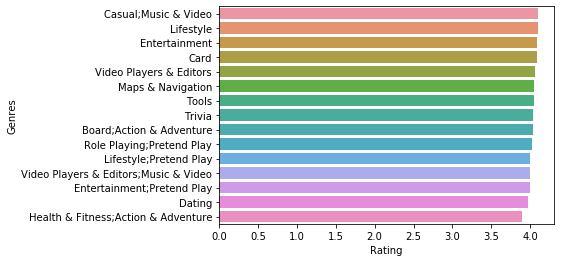

In [27]:
x_val= bot_10_rating.tail(15)
x_val.reset_index(drop =False, inplace = True)
bottom_10 = sns.barplot(y = 'Genres', x =  "Rating", data = x_val)
plt.savefig("Genres with the top 10 highest variation in ratings.png")


In [ ]:
### A zoom in on the educational data in the app store

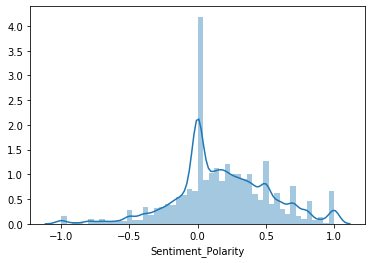

In [30]:
ax_setiment = sns.distplot(app_reviews["Sentiment_Polarity"])
tt= 0
types = ["Education", "Educational", "Educational;Brain Games", "Educational;Creativity", 
         "Books & Reference; Education", "Simulation;Education", "Parenting;Education", 
         "Education;Creativity", "Educational;Brain Games", 
        "Puzzle;Creativity", "Tools", "Education;Action & Adventure"]
education_data = pd.DataFrame()
for i in types:
    a = app_info.where(app_info["Genres"]==i)
    #a = a.astype(int)
    education_data.append(a)




for i in types: 
    e = app_info.where(app_info["Genres"] == i)
    e = e.dropna()
    education_data = education_data.append(e)


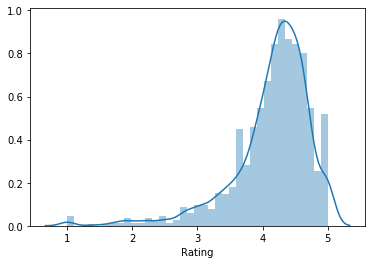

In [16]:

education_data
sns.distplot(education_data["Rating"])


#### cat plot of sentiment in the app reviews

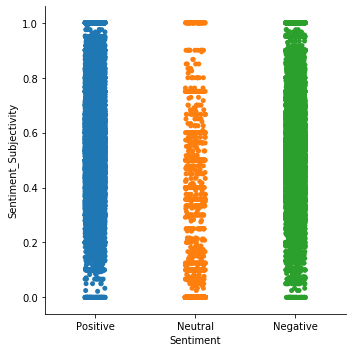

In [31]:
#ax_setiment_cat = sns.catplot(x = "Sentiment", y = "Sentiment_Polarity" , data = app_reviews)
ax_setiment_cat = sns.catplot(x = "Sentiment", y = "Sentiment_Subjectivity" , data = app_reviews)


In [32]:
### Scatter plot of subjectivity and polarity 

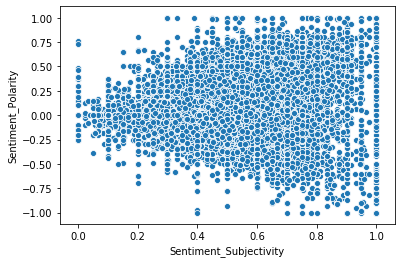

In [33]:
ax_setiment_cat = sns.scatterplot(x = "Sentiment_Subjectivity", y = "Sentiment_Polarity" , data = app_reviews)
##The more subjective the Sentiment is the more widely it ranges in polarity


## An attempt at logistic regression, based on subjectivity and sentiment. r^2 = 0.75. Which is better than just guessing

In [35]:
from sklearn.linear_model import LogisticRegression, LinearRegression
app_reviews_drop = app_reviews.dropna()
x = np.asarray(app_reviews_drop["Sentiment_Subjectivity"])
x= x.reshape(-1,1)
#x = app_reviews_drop["Sentiment_Subjectivity"]
y = app_reviews_drop["Sentiment"]
clf_logregression = LogisticRegression(random_state=0).fit(x,y)
clf_logregression.score(x,y) 


0.7500467576882999



<body>
  <p style="color:#3383ff";> From the above logistic regression of Sentiment Subjectivty and the binary sentiment indicator 75% of the data
could be accounted for using this logistic classifer. Perhaps with more parameter tuning we could improve this logistic regression, but by this we know that there is some relationship between the subjectivty and sentiment   </p>
</body>



In [36]:
x = np.asarray(app_reviews_drop["Sentiment_Subjectivity"])
y = np.asarray(app_reviews_drop["Sentiment_Polarity"])

clf_regression = LinearRegression().fit(x.reshape(-1, 1), y)

In [37]:
print("r^2 value for linear regressin of Sujectivity and Polarity", clf_regression.score(x.reshape(-1,1), y))


r^2 value for linear regressin of Sujectivity and Polarity 0.06842790494192219


<body>
  <p style="color:#3383ff";> From the above r2 score we can see that a linear regression model behaves quite poorly in finding a 
    relationship between the Sentiment Subjectivity and Polarity</p>
</body>


### For some exploritaty PCA analysis we sorted the app info into ratings over four and ratings under 2

In [38]:
app_reviews_headers = app_reviews_drop.head(0)

app_info_headers = app_info.head(0)

app_info["Rating"]
over_three = 4
rating_over_3 = app_info['Rating']>=4.0
rating_under_2 = app_info['Rating']<=2

app_info['Rating_over_3'] = rating_over_3
app_info['Rating_under_2'] = rating_under_2


app_info['Rating_under_2'] = app_info['Rating_under_2'].astype(int)
app_info['Rating_over_3'] = app_info['Rating_over_3'].astype(int)




In [39]:

over_3_5 = app_info.Rating_over_3.sum()
under_2 = app_info.Rating_under_2.sum()

print(over_3_5, "  <- reviews over 3.5 stars    ",  under_2, " <-  reviews under 2 stars  ")



7363   <- reviews over 3.5 stars     68  <-  reviews under 2 stars  


In [105]:
#### Preparing data for PCA and Descsion trees, Using Ordinal encoding and one hot encoding
vector = pd.DataFrame(data = app_info.copy().dropna())
vector = vector.dropna()


In [106]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder



def encode_data_ordinal(vector_app):
    #vector_app["Rating"] = vector_app.loc[["Rating"]]
    vector_app["Rating"] = vector_app["Rating"].round(0)
    
    #vector_app["Rating"] = vector_app["Rating"].apply(np.ceil)
    vector_app["Reviews"] = vector_app["Reviews"].astype(int)
    vector_app["Reviews"] = (vector_app["Reviews"].astype(float)).divide(10000)
    vector_app["Reviews"] = vector_app["Reviews"].round() * 10000
    #vector_app["Price"] = (vector_app["Price"].astype(float)).round()
    encoder = OrdinalEncoder()
    encoded_catagory = encoder.fit_transform(vector_app[["Category"]])
    #encoded_price = encoder.fit_transform(vector_app["Price"])
    encoded_rating = encoder.fit_transform(vector_app[["Rating"]].round(0))
    encoded_rev = encoder.fit_transform(vector_app[["Reviews"]])
    encoded_content = encoder.fit_transform(vector_app[["Content Rating"]])
    encoded_genre = encoder.fit_transform(vector_app[["Genres"]])
    encoded_installs = encoder.fit_transform(vector_app[["FixedInstalls"]])
    #print(encoded_catagory.shape)

    vector_app["Category"] = encoded_catagory
    vector_app["Rating"] = encoded_rating
    vector_app["Reviews"] = encoded_rev
    vector_app["Content Rating"] = encoded_content
    vector_app["Genres"] = encoded_genre
    vector_app["FixedInstalls"] = encoded_installs
    try:
        vector_app.drop(columns = {"Last Updated", "Current Ver", "Android Ver", "Type", "Size", "App", "Price", "Installs"}, inplace = True)
    except KeyError:
        return vector_app
    
    return vector_app
vecter_data_2 = encode_data_ordinal(vector)



In [101]:
vector = pd.DataFrame(data = app_info.copy().dropna())
def encode_data_one_hot(vector_app):
    encoded_columns = [ "Category",  "Content Rating", "Genres"]
    target_y = vector_app["Rating"]
    
    try:
        vector_app.drop(columns = {"Last Updated", "Current Ver", "Android Ver", "Type", "Size","App", "Price", "Installs", "Rating"}, inplace = True)
    except KeyError:
        a = 1
    for i in encoded_columns:
        print(i)
        
        one_hot = pd.get_dummies(vector_app[i])
        #(one_hot)

        
        vector_app = vector_app.drop(i,axis = 1)
        vector_app = vector_app.join(one_hot)
        
    
    
    
        
    return vector_app, target_y


In [102]:
vector = pd.DataFrame(data = app_info.copy())
test_1, target_y = encode_data_one_hot(vector)
#one_hot = pd.get_dummies(vector["Category"])
        
#vector = vector.join(one_hot)
        
#vector= vector.drop('Category',axis = 1)


Category
Content Rating
Genres


#### kmean analysis of the data

In [107]:
from sklearn.cluster import KMeans
vector = vector.dropna()
#vecter_data_2 = encode_data_ordinal(vector)
#education_data = encode_data_ordinal(education_data)
from sklearn import preprocessing
X = np.asarray(vecter_data_2)
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(X)
vectors_standardized = pd.DataFrame(x_scaled)

score_kmean = np.zeros(5)
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    
    score_kmean[i-2] = kmeans.score(x_scaled)
    

m = min(score_kmean)
print("The score of the k means clustering", min(score_kmean), "   the best number of clusters is: " , int(np.where(score_kmean == m)[0])+2)

The score of the k means clustering -41301028.676314965    the best number of clusters is:  2


In [108]:
score_kmean

array([-41301028.67631496, -13091524.4848185 , -13099049.03274091,
        -7031115.47215344,  -6957785.59958778])

#### PCA analysis of the data

array([0.24125696, 0.22338186])

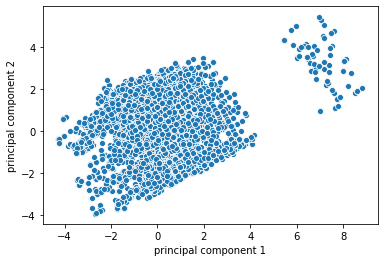

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
plot_d = sns.scatterplot(x = principalDf["principal component 1"], y = principalDf["principal component 2"])
pca.explained_variance_ratio_



 ### With the explained varience ratio of [0.24125696, 0.22338186], which means first principle component can describe 24% of the variation. It is okay but not really that great. PCA should be able to descibe more than that

Category
Content Rating
Genres


array([0.3726617 , 0.08182746])

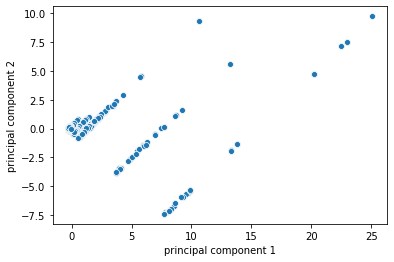

In [114]:
from sklearn.decomposition import PCA

vector = pd.DataFrame(data = app_info.copy().dropna())
test_1, target_y = encode_data_one_hot(vector)

min_max_scaler = preprocessing.StandardScaler()
test_1["Reviews"] = min_max_scaler.fit_transform(test_1[["Reviews"]])
test_1["FixedInstalls"] = min_max_scaler.fit_transform(test_1[["FixedInstalls"]])

#X.drop(columns = "Reviews")

X = np.asarray(test_1)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
plot_d = sns.scatterplot(x = principalDf["principal component 1"], y = principalDf["principal component 2"])
pca.explained_variance_ratio_



In [250]:
a


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,FixedInstalls


### From the above attempted k means clustering, we can see that even when trying to encode the catigorical data 
### there are three viable clusters. 
### From the explained varience Ratio, we can see that only >25% of the varience can be explained by the first principle

### Now set up the app review data and make it nice. 

In [122]:
vecter_data = pd.DataFrame(data = app_info.copy())
review_set = (app_reviews_drop[["Translated_Review", "Sentiment"]]).dropna()
p = review_set['Sentiment'] == "Positive"
positive = review_set.where(p)
n = review_set['Sentiment'] == "Negative"
negative = review_set.where(n)

In [123]:
negative, positive = negative.dropna(), positive.dropna()
print("Number of positive reviews after droping nans ", positive.shape[0])
print("Number of negative reviews after droping nans ", negative.shape[0])
a_v= vecter_data[["Category","Reviews","Content Rating", "Genres"]]



Number of positive reviews after droping nans  23998
Number of negative reviews after droping nans  8271



## Now make the decision tree 


In [125]:
from sklearn import tree
vector = pd.DataFrame(data = app_info.copy().dropna())
test_1, target_y = encode_data_one_hot(vector)
test_1.drop(["FixedInstalls","Reviews", "Rating_under_2", "Rating_over_3" ], axis = 1, inplace = True)
encoder = OrdinalEncoder()
target_y = np.asarray(target_y)
#test_1.drop(["FixedInstalls","Reviews"], axis = 1, inplace = True)
target_y = encoder.fit_transform(target_y.reshape(-1,1))

clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
estimator = clf.fit(test_1, target_y)

Category
Content Rating
Genres


In [126]:
from sklearn import tree
from sklearn.model_selection import train_test_split


encoder = OrdinalEncoder()
target_y = np.asarray(target_y)
target_y = encoder.fit_transform(target_y.reshape(-1,1))
test_1 = np.asarray(test_1)
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(test_1, target_y, test_size=0.1, random_state=0)
estimator = clf.fit(X_train, y_train)
predictions= clf.predict(X_test)
t, almost =0, 0
for i in range(0,len(predictions)-1):
 
    if(predictions[i] == y_test[i]):
        t+=1
    if(predictions[i] == y_test[i] or predictions[i] < y_test[i]):
        almost+=1

print("the accuracy of the test set ", t/len(predictions))
print("Allowing for some error the accuracy", almost/len(predictions))
    

0.11004273504273504
0.44337606837606836


### Now print the decision tree

The binary tree structure has 19 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, GAME] ---- 14 else to node 2.
	node=1 test node: go to node 3 if X[:, HEALTH_AND_FITNESS] ---- 15 else to node 4.
	node=2 test node: go to node 7 if X[:, Casual] ---- 64 else to node 8.
		node=3 test node: go to node 5 if X[:, Communication] ---- 73 else to node 6.
		node=4 leaf node.
			node=5 test node: go to node 9 if X[:, Education] ---- 76 else to node 10.
			node=6 leaf node.
		node=7 leaf node.
		node=8 leaf node.
				node=9 test node: go to node 11 if X[:, DATING] ---- 7 else to node 12.
				node=10 leaf node.
					node=11 test node: go to node 13 if X[:, LIFESTYLE] ---- 18 else to node 14.
					node=12 test node: go to node 15 if X[:, Everyone] ---- 34 else to node 16.
						node=13 test node: go to node 17 if X[:, Puzzle;Action & Adventure] ---- 121 else to node 18.
						node=14 leaf node.
						node=15 leaf node.
						node=16 leaf node.
							node=17 leaf no

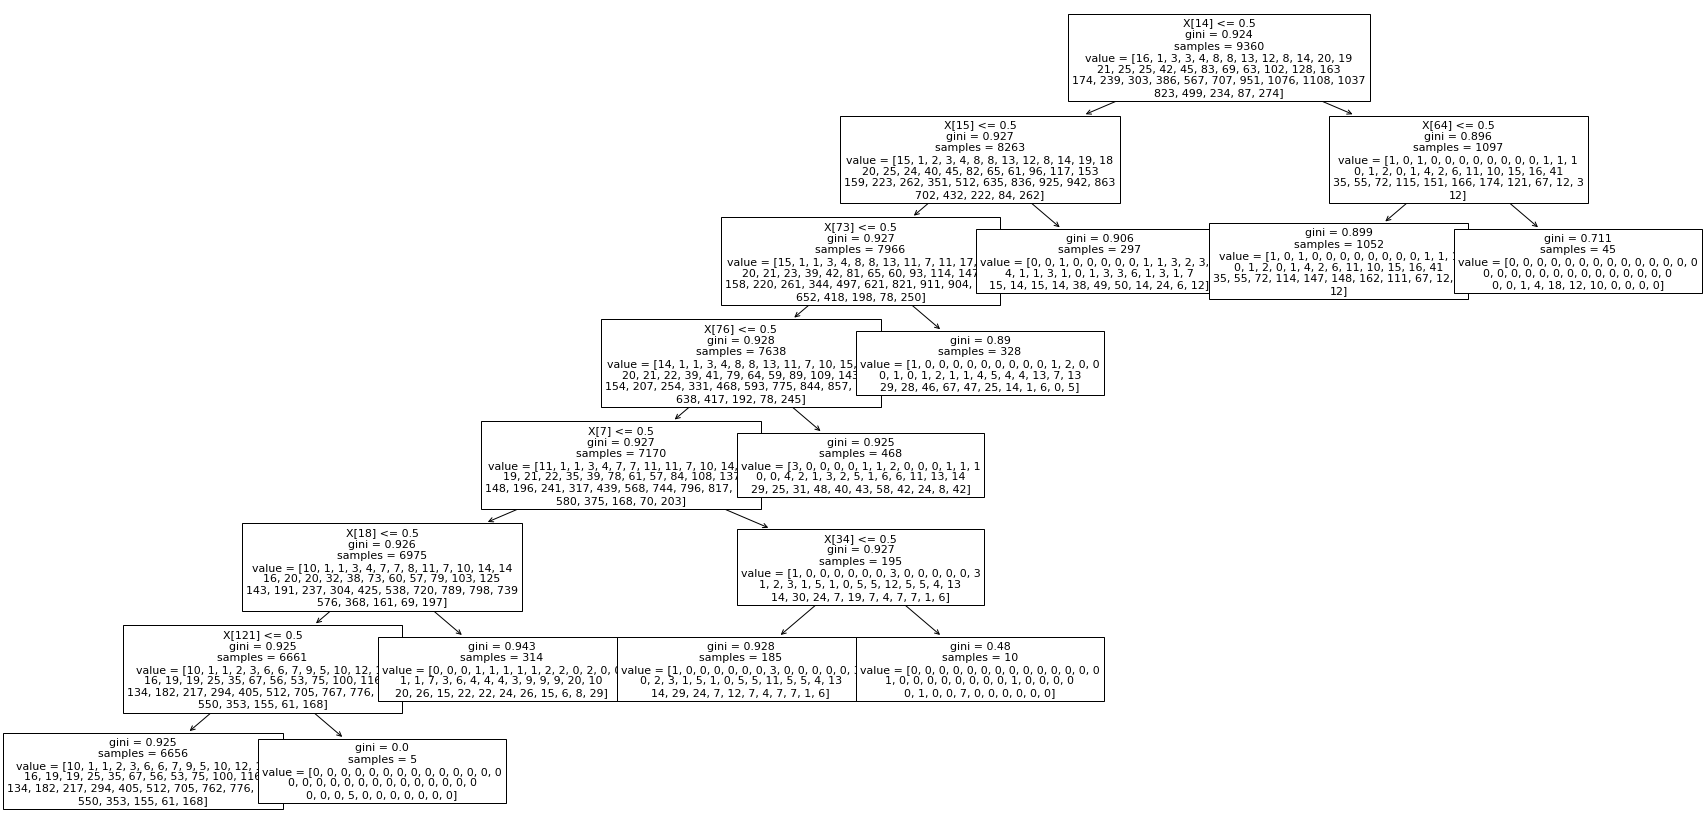

In [84]:
### code from https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

feat_list = test_1.columns.values.tolist()
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right

feature = estimator.tree_.feature
threshold = estimator.tree_.threshold
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] ---- %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feat_list[feature[i]],
                 feature[i],
                 children_right[i],
                 ))
print()

print("X [:, 1]    = Number of Installs")
print("X [:, 0]    = reviews")
fig, ax = plt.subplots(figsize=(30, 15))
tree = tree.plot_tree(clf, fontsize=11) 
plt.savefig('tree_pic_2.png')
plt.savefig('tree_pic_2.pdf')



## Now lets make the word clouds!

<body>
  <p style="color:#3383ff";> Now that we have removed nans from our reviews, lets make a word cloud to explore the types of words of negative and positive reviews  </p>
</body>


In [13]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

app_reviews

In [23]:
app_reviews
positive = app_reviews[app_reviews["Sentiment"] == "Positive"]
negative = app_reviews[app_reviews["Sentiment"] == "Negative"]


<body>
  <p style="color:#3383ff";> I created a word cloud using th emost common 50 words from both postive and negative reviews we 
      did leave out commonly used words from both positive and negative reviews to more fully understand the words used in each 
      of the word polarities. </p>
</body>

`STOPWORDS_2 = set(["The", "THE", "IT", "it", "AND", "and", "the", "it", "game", "you", "this", "I've", "I'm", "This"])`

In [24]:



pos_list, neg_list = [], []
for i in range(0, len(positive['Translated_Review'])-1):
    pos_list.append(positive['Translated_Review'].iloc[i].strip())
for j in range(0, len(negative['Translated_Review'])-1):
    neg_list.append(negative['Translated_Review'].iloc[j].strip())

positive_reviews = pos_list
negative_reviews = neg_list

STOPWORDS_2 = set(["The", "THE", "IT", "it", "AND", "and", "the", "it", "game", "you", "this", "I've", "I'm", "This"])
wordcloud_pos = WordCloud(
    width = 300,
    height = 200,
    max_words = 50, 
    background_color = 'white',
    stopwords = list(STOPWORDS_2) + list(STOPWORDS),
    collocations=False
).generate(str(positive_reviews))

wordcloud_neg = WordCloud(
    width = 300,
    height = 200,
    max_words = 50, 
    background_color = 'black',
    collocations=False,
    stopwords = list(STOPWORDS_2) + list(STOPWORDS)
).generate(str(negative_reviews))

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'

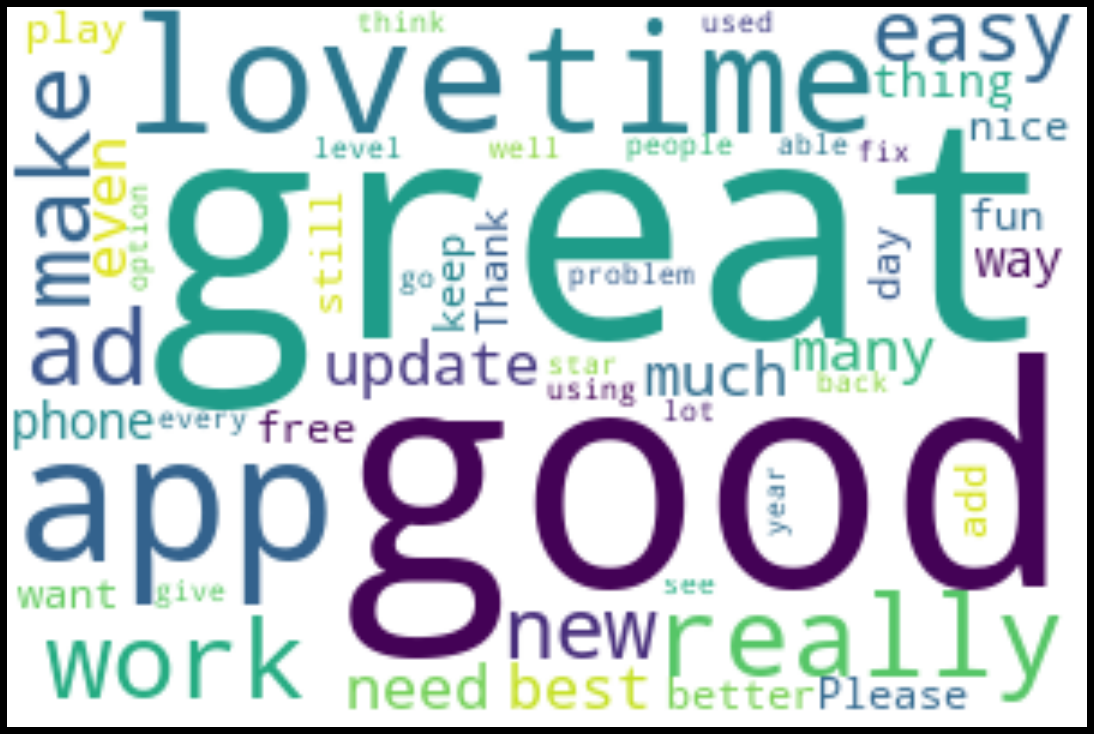

In [26]:
fig_pos = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud_pos, interpolation = 'bilinear')

plt.axis('off')
plt.tight_layout(pad=0)

fig_pos.savefig("pos_review_wordcloud.jpeg")


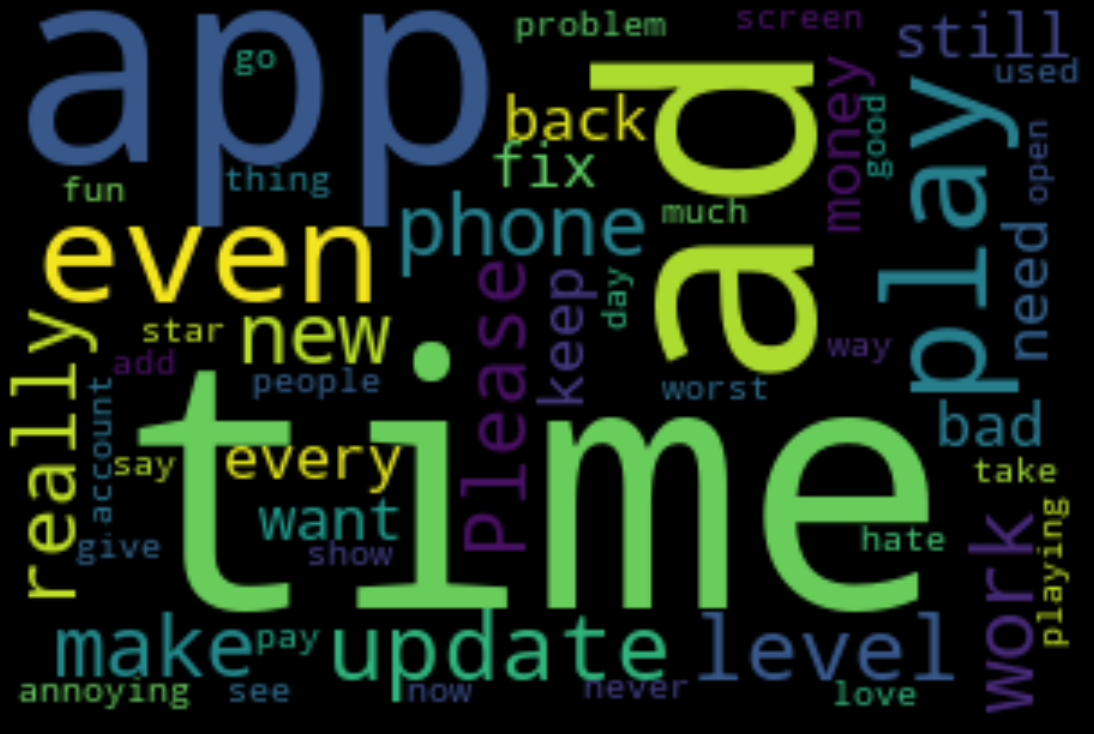

In [27]:
fig_neg = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_neg, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig_neg.savefig("neg_review_wordcloud.jpeg")

In [28]:


my_pos_rated_set = set()
my_neg_rated_set = set()
for i in positive_reviews:
    x = i.split(" ")
    for l in x:
        my_pos_rated_set.add(l)
for j in negative_reviews: 
    y = j.split(" ") 
    for r in y: 
        my_neg_rated_set.add(r)

In [29]:

len_neg = len(my_neg_rated_set)
len_pos = len(my_pos_rated_set)
pos_neg_union = my_neg_rated_set.union(my_pos_rated_set)
len_union = len(pos_neg_union)
pos_neg_intersection = my_neg_rated_set.intersection(my_pos_rated_set)
len_inter = len(pos_neg_intersection)

print("Length of negative set:  ", len_neg, "  length of postive set  ", len_pos, "  size of intersection  ", len_inter)


Length of negative set:   21830   length of postive set   40350   size of intersection   12547


In [32]:
pval = 0
pvar = 0
nvar=0
nval = 0
for i in my_pos_rated_set:
    pval+= len(i)
    pvar+= (len(i))**2
for j in my_neg_rated_set:
    nval += len(j)
    nvar += (len(j))**2
    
pvar = ((pvar/len(my_pos_rated_set) )- (pval/len(my_pos_rated_set))**2)
nvar = ((nvar/len(my_neg_rated_set) )- (nval/len(my_neg_rated_set))**2)

####  From length analysis we can determine that the mean of exlusivly negative words are shorter however there is more varience between the words

#### conducting a hypothesis test 
### $H_0: \mu_{pos length}= \mu_{neg length} $
### $H_A : \mu_{pos length} \neq \mu_{neg length} $


### $z = \frac{ \mu_{pos}-\mu_{neg} - 0}{            \sqrt{\frac{\sigma^2_{pos}}{m}+\frac{\sigma_{neg}^2}{n}} }$

#### With the below calculated z-score of 9.5 we fail reject the null hypothesis as siginficance level 0.00001
#### so we can safetly say that the length of positive and negative reviewed words are not equal

In [88]:
pmean = (pval/len(my_pos_rated_set))
nmean = (nval/len(my_neg_rated_set))

print("positive set mean  ", (pval/len(my_pos_rated_set)))
print("negative set mean  " , (nval/len(my_neg_rated_set)))
      
print("positive set  var ", pvar)
print("negative set  var " , nvar)
z_score_len_of_words = (pmean-nmean)/(np.sqrt(((pvar/ len(my_pos_rated_set))+(nvar/ len(my_neg_rated_set)))))

print("z score   " , z_score_len_of_words)

positive set mean   7.227360594795539
negative set mean   6.972514887769125
positive set  var  8.764069241718609
negative set  var  10.976706776576336
z score    9.497354626482709



### Now lets conduct the same analysis on the length of the review word count wise of negative and postive reviews. 
### $H_0: \mu_{pos length}= \mu_{neg length} $
### $H_A : \mu_{pos length} \neq \mu_{neg length} $

### $z = \frac{ \mu_{pos}-\mu_{neg} - 0}{            \sqrt{\frac{\sigma^2_{pos}}{m}+\frac{\sigma_{neg}^2}{n}} }$

#### Again we see that we the differences between the word count of a postive and negative review are statistically valid.

#### In fact we can say with 99.8% accuracy that the word length on average between a positive and negative review will differ  by about 3.5 words or about 4 words. 


In [36]:

len_pos, len_neg, len_pos_s, len_neg_s = 0, 0, 0, 0
for review in positive_reviews:

    len_pos += len(review.split(" "))
    len_pos_s += len(review.split(" "))**2
    
for review in negative_reviews: 
    len_neg += len(review.split(" "))
    len_neg_s +=len(review.split(" "))**2
    
mean_pos_word = len_pos/len(positive_reviews)
mean_neg_word = len_neg/len(negative_reviews)
    
p_word_var = ((len_pos_s/len(positive_reviews) )- ((mean_pos_word)**2))
n_word_var = ((len_neg_s/len(negative_reviews) )- ((mean_pos_word)**2))

In [37]:
print("mean letter count in positive review   ", mean_pos_word, "   varience ", p_word_var)
print("mean letter count in negative review    " , mean_neg_word, "   varience  ", n_word_var)

z_score_len_of_review = (mean_pos_word-mean_neg_word)/(np.sqrt(((p_word_var/ len(positive_reviews))+(n_word_var/ len(negative_reviews)))))
print("z score of length of review is   : " , z_score_len_of_review)

mean word count in positive review    19.15768637746385    varience  296.7186446117296
mean word count in negative review     22.10290205562273    varience   398.7901868828085
z score of length of review is   :  -11.9654905730164


In [38]:


delta_zero = (3.5/2) * (np.sqrt(((p_word_var/ len(positive_reviews))+(n_word_var/ len(negative_reviews))))) \
             -((mean_pos_word-mean_neg_word))
print(" on average a positive and negative review will differ by   ", delta_zero,   " words ")

 on average a positive and negative review will differ by    3.375965040696612  words 


3.375965040696612

In [128]:
app_review_drop  = app_reviews.dropna()

#a = app_review_drop.loc[app_review_drop["App"] == list_of_apps[9]]
#a["Sentiment_Polarity"].var()

In [129]:
app_review_col = app_review_drop.columns.values.tolist()
app_review_col[0]
list_of_apps = app_review_drop["App"].unique()


In [130]:

counter, mean_polar, var_polar, mean_sub, var_sub = 0, [], [], [],[]
test = pd.DataFrame()

for i in list_of_apps:
    
    a = app_review_drop.loc[app_review_drop["App"] == i ]
    a = a.dropna()
    counter +=1
    mean_polar.append(a["Sentiment_Polarity"].mean())
    var_polar.append(a["Sentiment_Polarity"].var())
    mean_sub.append(a["Sentiment_Subjectivity"].mean())
    var_sub.append(a["Sentiment_Subjectivity"].var())

    
## Now lets see what the free apps are
counter, mean_polar, var_polar, mean_sub, var_sub = 0, [], [], [],[]
test = pd.DataFrame()

for i in list_of_apps:
    
    a = app_review_drop.loc[app_review_drop["App"] == i ]
    a = a.dropna()
    counter +=1
    mean_polar.append(a["Sentiment_Polarity"].mean())
    var_polar.append(a["Sentiment_Polarity"].var())
    mean_sub.append(a["Sentiment_Subjectivity"].mean())
    var_sub.append(a["Sentiment_Subjectivity"].var())
   

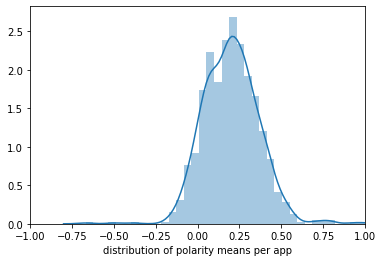

In [131]:
#app_rev_sentiment = sns.distplot(var_polar)
##Since variation on the poliarty across apps is not equal we cannot do ANOVA on it 
app_rev_sentiment_mean = sns.distplot(mean_polar)
plt.xlabel("distribution of polarity means per app")
plt.xlim(-1.0, 1.0)
plt.savefig("dist_of_polarity.png")
## We can see from the below plot that the mean is not normally distributed 


## Distribution plot of polarity means

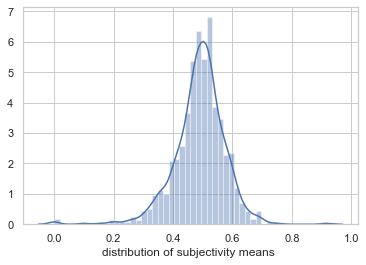

In [91]:
#app_rev_sentiment = sns.distplot(np.sqrt(var_sub))
##Since variation on the poliarty across apps is not equal we cannot do ANOVA on it 
app_rev_sentiment_mean = sns.distplot(mean_sub)
plt.xlabel("distribution of subjectivity means ") 

plt.savefig("dist_of_subjectivity.png")


#### More cleaning of the app review data

In [49]:
list_of_apps[520]

pos_sorted, neg_sorted = [],[]
for app_name in list_of_apps:
    a= app_review_drop.where(app_review_drop['App'] == app_name)
    a = a.dropna()
    v = a["Sentiment_Polarity"].mean()
    if(v > 0 and len(a["Sentiment_Polarity"])>0): 
    
        for i in range(0, len(a['Translated_Review'])-1):
            
            pos_sorted.append(a['Translated_Review'].iloc[i].strip())
    elif(len(a["Sentiment_Polarity"])>0):
        for i in range(0, len(a['Translated_Review'])-1): 
            neg_sorted.append(a['Translated_Review'].iloc[i].strip())

In [56]:
import re
my_pos_rev = []
my_neg_rev = []
for i in pos_sorted:
    i.replace("'", "")
    s = re.sub(r'[^a-zA-Z0-9\s]', "", str(i))
    
    s = s.split(" ")

    for l in s:
    
        my_pos_rev.append(l)
        
for i in neg_sorted:
    i.replace("'", "")
    s = re.sub(r'[^a-zA-Z0-9\s]', '', str(i))
    
    s = s.split(" ")
    for l in s:
        my_neg_rev.append(l)

In [63]:


print( "number of a positive review  : ", len(my_pos_rev), "   amount of negative reviews     :", len(my_neg_rev))
my_pos_set = set(my_pos_rev)
my_neg_set = set(my_neg_rev)
len(my_pos_set), len(my_neg_set)

number of a positive review  :  607992    amount of negative reviews     : 68002


(29113, 7763)

# We want to create a bar chart of top 50 words in positve and negative over all reviews


In [65]:


def makeHashTable(pos_rev, neg_rev, prime_pos, prime_neg):
    pos_hash_table = np.zeros(prime_pos)
    neg_hash_table = np.zeros(prime_neg)
    pos_words = [None]*pos_prime
    neg_words = [None]* prime_neg
    for pos_word in pos_rev:
        x = hash(pos_word)% 29123
        pos_hash_table[x] +=1
    
        pos_words[x] = pos_word
    
    
    for neg_word in  neg_rev:
        y = hash(neg_word)% 7789
        neg_hash_table[y] +=1
        neg_words[y] = neg_word
    return pos_hash_table, pos_words, neg_hash_table, neg_words



In [82]:
pos_prime, neg_prime = 29123, 7789
pos_hash_table, pos_words, neg_hash_table, neg_words = makeHashTable(my_pos_rev, my_neg_rev, pos_prime, neg_prime)


top_50_pos = []
counts_n, counts_p = [], []
top_50_neg = []


for i in range(0,15):
    
    a_pos_max = np.max(pos_hash_table)
    x_pos= (np.where(pos_hash_table == a_pos_max ))[0].astype(int)
    pw = pos_words[x_pos[0]].strip()
    
    a_neg_max = np.max(neg_hash_table)
    x_neg= (np.where(neg_hash_table == a_neg_max ))[0].astype(int)
    nw = neg_words[x_neg[0]].strip()
    try: 
    
        nw = nw.lower()
       
    except AttributeError:
       
        neg_hash_table[x_neg] = -1
        
    try: 
        pw = pw.lower()
    except AttributeError:
        pos_hash_table[x_pos] = -1
    
    ##I know this is ugly
    #comment out common neg_pos to remove the intersection of words
    stop_list = ["", " ", "", "the", ' ', "I", "i", 'game', "get", "this", "its", "it", "im", "ive", "app", "like", "even"]+common_neg_pos
    
    if( pw not in stop_list):
        
        pos_hash_table[x_pos] = -1
        top_50_pos.insert(i, pw)
        counts_p.insert(i, a_pos_max)
        
    elif(pw in stop_list ) :
        pos_hash_table[x_pos] = -1
        
    if( (nw not in stop_list) ):
        neg_hash_table[x_neg] = -1
        top_50_neg.insert(i, nw)
        counts_n.insert(i, a_neg_max)
        
    elif(nw in stop_list):
        neg_hash_table[x_neg] = -1
        


In [83]:
top_50_neg_set = set(top_50_neg)
top_50_pos_set = set(top_50_pos)
common_neg_pos = top_50_neg_set.intersection(top_50_pos_set)
common_neg_pos = list(common_neg_pos)

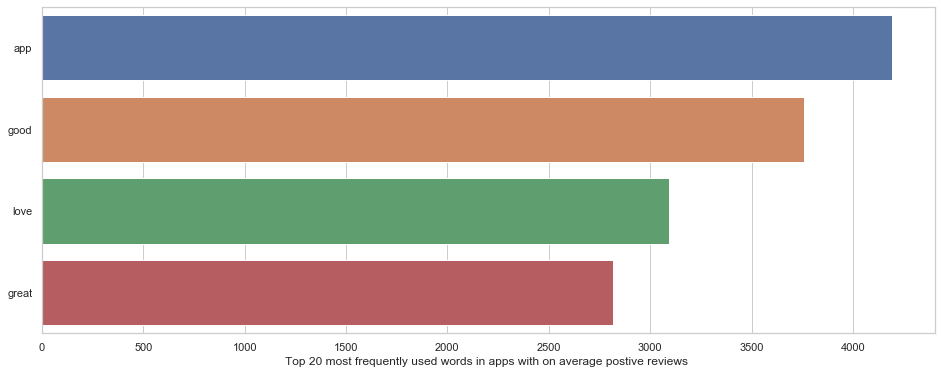

In [86]:


plt.figure(figsize=(16, 6))
bar_plot = sns.barplot(y = top_50_pos, x = counts_p)
plt.xlabel("Top 20 most frequently used words in apps with on average postive reviews ")
plt.savefig("Top20pos.png")

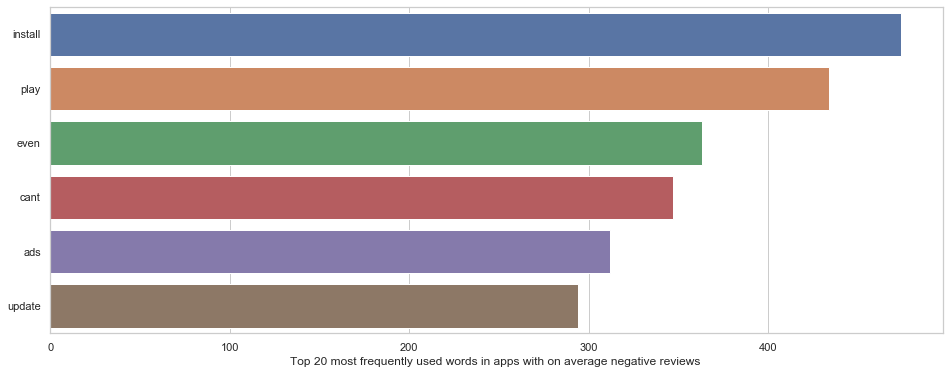

In [87]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))

bar_plot = sns.barplot(y = top_50_neg, x = counts_n)
plt.xlabel("Top 20 most frequently used words in apps with on average negative reviews ")
plt.savefig("Top20neg.png")

In [ ]:
# Fin

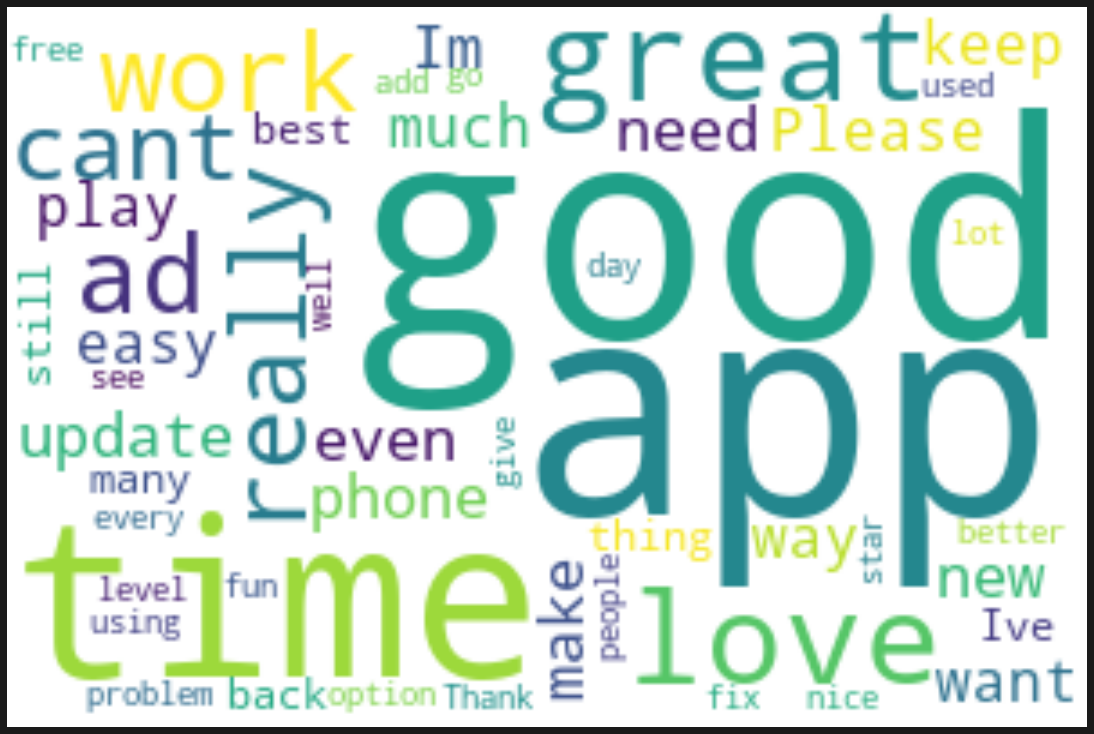

In [81]:
text = " ".join(my_pos_rev)
wordcloud_workout = WordCloud(
    width = 300,
    height = 200,
    max_words = 50, 
    background_color = 'white',
    collocations=False,
    stopwords = list(STOPWORDS_2) + list(STOPWORDS)
).generate(text)


fig_pos = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud_workout, interpolation = 'bilinear')

plt.axis('off')
plt.tight_layout(pad=0)

fig_pos.savefig("pos_review_wordcloud.jpeg")

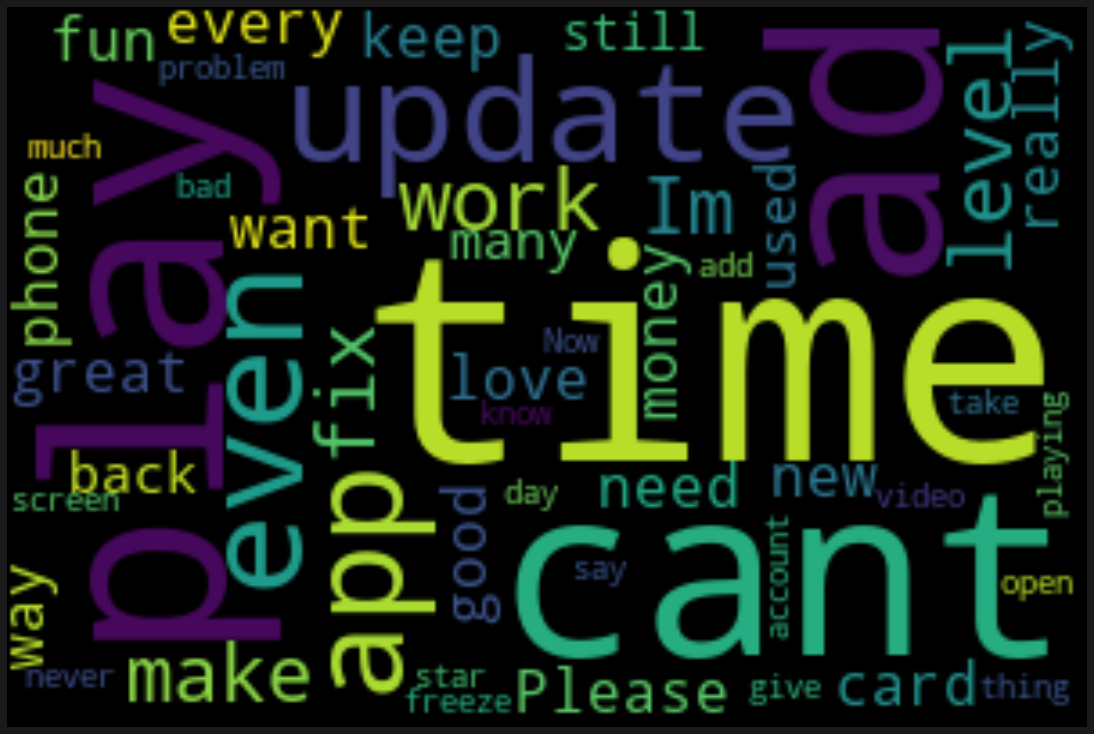

In [75]:
text = " ".join(my_neg_rev)
wordcloud_neg_rev = WordCloud(
    width = 300,
    height = 200,
    max_words = 50, 
    background_color = 'black',
    collocations=False,
    stopwords = list(STOPWORDS_2) + list(STOPWORDS)
).generate(text)


fig_pos = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud_neg_rev, interpolation = 'bilinear')

plt.axis('off')
plt.tight_layout(pad=0)

fig_pos.savefig("neg_review_wordcloud.jpeg")


output.